In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas\Documents\GitHub\Cd\Projeto3


In [2]:
dados = pd.read_excel('Fertilidade.xlsx',index_col=0)
dados1 = pd.read_excel('Estudo.xlsx',index_col=0)
dados2 = pd.read_excel('IDH.xlsx',index_col=0)
                     

In [3]:
d = pd.DataFrame()
d1 = pd.DataFrame()
d2 = pd.DataFrame()

In [4]:
d = dados.Sete
d1 = dados1.Sete
d2 = dados2.Sete

In [5]:
d.head()

Abkhazia                  NaN
Afghanistan              6.46
Akrotiri and Dhekelia     NaN
Albania                  1.80
Algeria                  2.66
Name: Sete, dtype: float64

In [6]:
D = pd.DataFrame()

In [7]:
D['Fertilidade'] = d
D['Estudo'] = d1
D['IDH'] = d2

In [8]:
D=D[~np.isnan(D.Fertilidade)]
D = D[~np.isnan(D.Estudo)]
D = D[~np.isnan(D.IDH)]

In [9]:
D.head()

,Fertilidade,Estudo,IDH
Algeria,2.66,96.39509,0.680
Argentina,2.25,102.61247,0.780
Armenia,1.40,101.31553,0.715
Austria,1.38,103.44956,0.870
Bahamas,1.88,102.36646,0.770


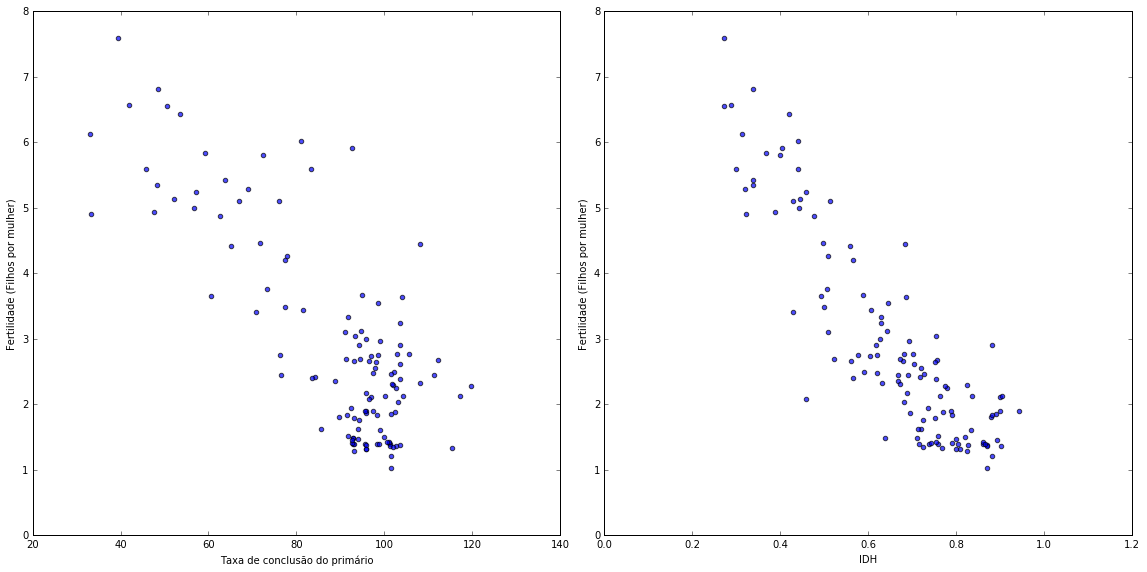

In [10]:
f, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].scatter(D.Estudo, D.Fertilidade, alpha=0.7) 
ax[0].set_xlabel("Taxa de conclusão do primário")
ax[0].set_ylabel("Fertilidade (Filhos por mulher)")

ax[1].scatter(D.IDH, D.Fertilidade, alpha=0.7) 
ax[1].set_xlabel("IDH")
ax[1].set_ylabel("Fertilidade (Filhos por mulher)")
ax[1].set_xlim(0,1.2)

plt.tight_layout(1)

In [24]:
somaxy = 0
somax = 0
somay = 0
somax2 = 0
n= D.count()[0]
for i in range(n):
    
    somaxy += D.IDH[i]*D.Fertilidade[i]
    somax += D.IDH[i]
    somay +=D.Fertilidade[i]
    somax2 += (D.IDH[i])**2
    
b1 = ((n * somaxy) - (somax * somay))/((n*somax2) - (somax)**2)
b0 = (somay - somax *b1)/n

print("O parametro B1 é:",b1)
print("O parametro B0 é:",b0)

O parametro B1 é: -7.98585857862
O parametro B0 é: 8.16764769541


In [25]:
somaxyB = 0
somaxB = 0
somayB = 0
somax2B = 0
n= D.count()[0]
for i in range(n):
    somaxyB += D.Estudo[i]*D.Fertilidade[i]
    somaxB += D.Estudo[i]
    somayB +=D.IDH[i]
    somax2B += (D.Fertilidade[i])**2
    
b1B = ((n * somaxyB) - (somaxB * somayB))/((n*somax2B) - (somaxB)**2)
b0B = (somayB - somaxB *b1B)/n
print("O parametro B1 é:",b1B)
print("O parametro B0 é:",b0B)

O parametro B1 é: -0.0230289998268
O parametro B0 é: 2.69015795749


In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


D.corr(method='pearson')

In [27]:
X = dados[['Estudo', 'IDH']]
y = dados['Fertilidade']


X = sm.add_constant(X)
est = sm.OLS(y, X).fit()


xx1, xx2 = np.meshgrid(np.linspace(X.Estudo.min(), X.Estudo.max(), 100), 
                       np.linspace(X.Idh.min(), X.IDH.max(), 100))


Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# cria matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot Superficie
surf = ax.plot_surface(xx1, xx2, Z, alpha=0.3, color='None',linewidth=0)

# pontos acima da superfície são x, pontos abaixo são o
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Estudo, X[resid >= 0].IDH, y[resid >= 0], marker='x', alpha=1.0)
ax.scatter(X[resid < 0].Estudo, X[resid < 0].IDH, y[resid < 0], marker='o', alpha=1.0)

# set axis labels
ax.set_xlabel('PIB/capita, PPP$ com ajuste de inflação (ln)')
ax.set_ylabel('kcal/pessoa e dia')
ax.set_zlabel('Expectativa de Vida (anos)')

KeyError: "['Estudo' 'IDH'] not in index"

In [28]:
y=D.Fertilidade
X=D.iloc[:,(1,2)]
X=sm.add_constant(X)
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

NameError: name 'sm' is not defined

## Interpretação dos Parâmetros

Analisando os parâmetros obitidos com os testes acima, nota-se que Beta um, coeficiente angular que relaciona IDH a fertilidade das mulheres, vale aproximadamente .. . Sendo assim, conclui-se que ao aumentarmos .... no IDH dos países isso afetará a fertlidade em uma redução de  ... filhos por mulher . O Beta 2, coeficiente angular que relaciona o Estudo do primário completo com a fertilidade das mulheres, vale aproximadamente .... . Sendo assim, conclui-se que com o aumento ... anos de estudo completo, haverá uma redução estimada de ... anos na expectativa de vida.

## Objetivo

O objetivo do projeto é compreender de que maneira a variação do IDH, além da taxa de estudo primário completo de um país podem afetar a fertlidade das mulheres nele. Ou seja, o objetivo é ver como a educação de um pais, além de seu desenvolvimento afetam o numéro de crianças médio que nascem de cada mulher.

A fim de verificar se o nosso modelo era ideal para o estudo, procuramos entender o coeficiente de determinação, o qual deve ficar entre 0 e 1, sendo o coeficiente proximo de um o melhor ajuste. No nosso caso o coeficiente possui valor .... o que mostra que nosso modelo é ideal para compreender essas variaveis. 

## Análise dos resultados

# Conclusão



Sendo o objetivo do estudo analisar se o IDH de um país além da taxa de conclusão do primário dele influenciam a fertilidade das mulheres (crianças por mulheres) podemos tirar algumas conclusões com este projeto. Com os testes acima, podemos observar que quanto maior é o IDH de um país, assim como a taxa de conclusao do estudo primário da população, menor será a fertlidade das mulheres do país. Relacionando este estudo com o momento atual em que vivemos, podemos comprovar o que está ocorrendo com muitos países europeus. Sua população está diminuindo a medida que os anos estão passando, ou seja, as familias estao decidindo ter apenas um filho ou não tê-los, preocupando assim as autoridades do país.